THIS IS THE TASK SUBMISSION PROJECT : FACULTY PORTAL UPGRADATION

/var/folders/by/qnxy7rb9027b5z2xcd58lzlc0000gn/T/ipykernel_89938/3791290725.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_df['State/UT'][32] = "And. and Nico. Islands(UT)"
/var/folders/by/qnxy7rb9027b5z2xcd58lzlc0000gn/T/ipykernel_89938/3791290725.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_df['State/UT'][33] = "Dadra Nagar Haveli(UT)"


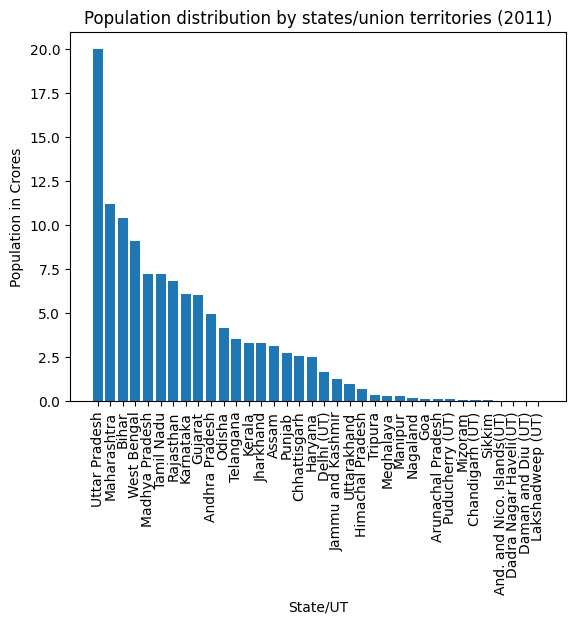

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import numpy as np

url = 'https://en.wikipedia.org/wiki/Demographics_of_India'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
tables = soup.find_all('table')
table = tables[8]
table_df = pd.read_html(str(table))[0]


table_df['State/UT'][32] = "And. and Nico. Islands(UT)"
table_df['State/UT'][33] = "Dadra Nagar Haveli(UT)"
x = np.array(table_df['State/UT'])
y = np.array(table_df['Population[59]']) / (10**7)
plt.bar(x[0:-1], y[0:-1])
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Population in Crores')
plt.title('Population distribution by states/union territories (2011)')
plt.show()